In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import pickle

from AIS_data_analysis import AIS_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Load AIS Data and Calculate MA Histogram
AIS_df = AIS_tools.resample_time_all(load_pickle=True)[0]
hist_ma201 = AIS_tools.get_ma_histogram(AIS_df, 201)

In [21]:
with (open("/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/Longterm_MA_2015_201.pkl", "rb")) as f:
    nccf15 = pickle.load(f)

In [32]:
SNR, peak_idx, noise_std = nccf15.snr_of_peak_amp('s1b0A')

print(SNR.shape)
print(hist_ma201[100:8660].shape)

(8560,)
(8560,)


[[nan nan]
 [nan  1.]]


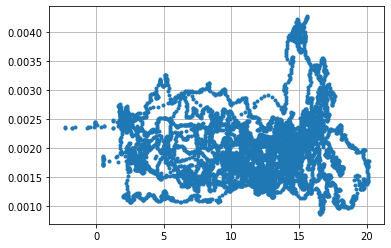

In [37]:
plt.plot(SNR,hist_ma201[100:8660], '.')
plt.grid()

In [49]:
# Calculate correlation coefficient
# Drop all NA values

mask = np.isnan(SNR)

SNR_valid = SNR[~mask]
hma_valid = hist_ma201[np.where(mask==0)]
r = np.corrcoef(SNR_valid, hma_valid)
print(r)

[[1.         0.03126788]
 [0.03126788 1.        ]]
